In [ ]:
 # Google Drive Mount
from google.colab import drive
drive.mount("/gdrive", force_remount = True)

#Change directory to Google drive

%cd /gdrive/My \Drive/제주신용카드경진대회/외부데이터

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/제주신용카드경진대회/외부데이터


In [ ]:
pip install fbprophet

In [ ]:
pip install datawig

     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 7.1MB 5.4MB/s 
     |████████████████████████████████| 10.4MB 43.8MB/s 
     |████████████████████████████████| 29.6MB 102kB/s 
  Created wheel for datawig: filename=datawig-0.2.0-cp36-none-any.whl size=72676 sha256=83b010da56dd0f96e2889527a8d7a9f5cb7dd2b45bb43b387c8e0794ee415187
  Stored in directory: /root/.cache/pip/wheels/85/07/ea/bd5addfefc4f04ba78700db67d77e59148c30b1be4ac34c157
Successfully built datawig
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: mxnet 1.4.0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.18.5 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successf

In [ ]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=3cd57f2688b0857d1f960c149c56bd1bc9bc71e686f03bb36c9af7212d214e73
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from datetime import datetime
import calendar
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

import datawig
from sklearn.metrics import f1_score, classification_report


from bayes_opt import BayesianOptimization
from sklearn import model_selection
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importing matplotlib failed. Plotting will not work.


## 프로펫 이용한 외부데이터 예측값

final_predictset

In [ ]:
data=pd.read_csv('소매판매액_불변지수.csv', encoding = 'ISO-8859-1')
data.rename(columns = {'YM' : 'ds','Y':'y'}, inplace = True)


def month_converter(month):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return months.index(month) + 1

yearmonth_full=[]
yearmonth_list=data['ds']
for i in range(0,len(data)):
  yearmonth=yearmonth_list[i]
  x=yearmonth.split('-')
  year_full='20'+str(x[0])
  month_full=month_converter(x[1])
  day=calendar.monthrange(int(year_full), month_full)[1]
  full=year_full+'-'+str(month_full)+'-'+str(day)

  yearmonth_full.append(full)

data['ds']=yearmonth_full
data.head()

,ds,y
0,2001-1-31,61.4
1,2001-2-28,55.5
2,2001-3-31,62.2
3,2001-4-30,63.1
4,2001-5-31,65.4


<function matplotlib.pyplot.show>

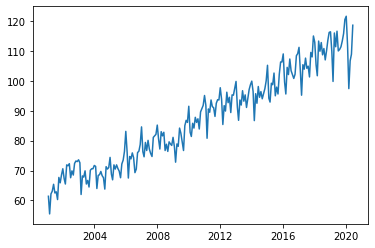

In [ ]:
data['ds']=pd.to_datetime(data.ds)
plt.plot(data['ds'],data['y'],label="value")
plt.show

In [ ]:
## 5월 데이터 제외하고
data_wo=data[:-1]

m = Prophet(seasonality_mode='multiplicative') # Default growth='linear'
m.fit(data_wo)

future = m.make_future_dataframe(periods=4, freq = 'm')
future.tail(10)

2020-07-22 11:46:34,840 [INFO]  NumExpr defaulting to 2 threads.
2020-07-22 11:46:34,859 [INFO]  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2020-07-22 11:46:34,860 [INFO]  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
226,2019-11-30
227,2019-12-31
228,2020-01-31
229,2020-02-29
230,2020-03-31
231,2020-04-30
232,2020-05-31
233,2020-06-30
234,2020-07-31
235,2020-08-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
226,2019-11-30,117.532025,114.779864,120.403053
227,2019-12-31,120.501264,117.581192,123.136434
228,2020-01-31,112.726249,110.015977,115.446740
229,2020-02-29,105.323604,102.732265,108.171429
230,2020-03-31,113.659998,110.812803,116.516857
231,2020-04-30,112.544531,109.649844,115.347222
232,2020-05-31,118.066114,115.301167,121.140113
233,2020-06-30,113.964242,111.369255,117.125444
234,2020-07-31,114.206790,111.386474,116.917443
235,2020-08-31,109.811646,106.968461,112.630234


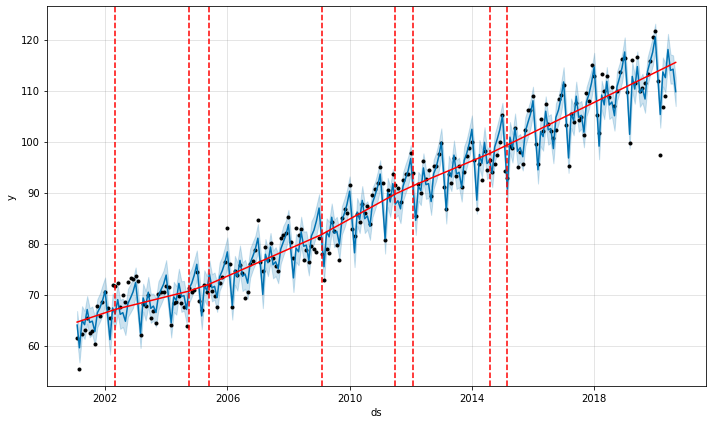

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
predict_df=forecast[['ds', 'yhat']]

to_cp=pd.merge(predict_df,data,on='ds',how='left')
to_cp

,ds,yhat,y
0,2001-01-31,64.027168,61.4
1,2001-02-28,59.572224,55.5
2,2001-03-31,64.967739,62.2
3,2001-04-30,64.099551,63.1
4,2001-05-31,67.077391,65.4
...,...,...,...
231,2020-04-30,112.544531,108.9
232,2020-05-31,118.066114,118.6
233,2020-06-30,113.964242,NaN
234,2020-07-31,114.206790,NaN


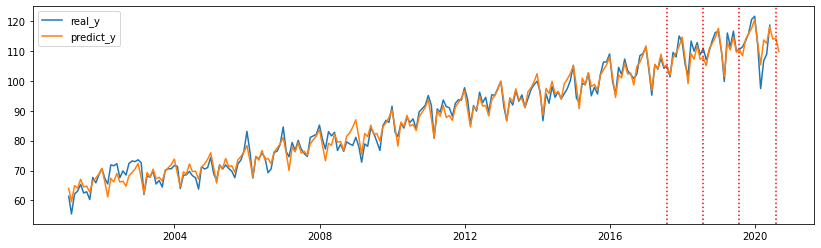

In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plt.plot(to_cp['ds'],to_cp['y'],label="real_y")
plt.plot(to_cp['ds'],to_cp['yhat'],label="predict_y")
# show a legend on the plot
plt.legend()
plt.axvline(x=datetime(2017,7,31)	, color='r', linestyle=':')
plt.axvline(x=datetime(2018,7,31)	, color='r', linestyle=':')
plt.axvline(x=datetime(2019,7,31)	, color='r', linestyle=':')
plt.axvline(x=datetime(2020,7,31), color='r', linestyle=':')
# Display a figure.
plt.show()

In [ ]:
dates=to_cp['ds']
date_index=[]
for i in range(0,len(to_cp)):
  date_to=str(dates[i])
  if '-05-' in date_to:
    date_index.append(i)
  elif '-06-' in date_to:
    date_index.append(i)
  elif '-07-' in date_to:
    date_index.append(i)
  elif '-08-' in date_to:
    date_index.append(i)

to_compare=to_cp.iloc[date_index,:]
to_compare.tail(15)

,ds,yhat,y
197,2017-06-30,104.765059,104.2
198,2017-07-31,105.162834,104.9
199,2017-08-31,101.838962,101.3
208,2018-05-31,111.821774,112.8
209,2018-06-30,107.191668,108.7
210,2018-07-31,107.768169,110.8
211,2018-08-31,105.079960,107.0
220,2019-05-31,114.715905,116.6
221,2019-06-30,109.592319,110.0
222,2019-07-31,110.372431,110.5


In [ ]:
predicted_value=predict_df.iloc[232:235,:]
predicted_value.rename(columns = {'yhat':'y'}, inplace = True)
predicted_value=predicted_value.reset_index(drop=True)

final_predictset=pd.concat([data_wo,predicted_value],axis=0)

##원데이터 형태에 맞게 처리
final_predictset=final_predictset.reset_index(drop=True)

new_dates=[]
new_date=final_predictset['ds'].dt.strftime('%Y%m')
for i in range(0,len(final_predictset)):
  new_dates.append(int(new_date[i]))

final_predictset['ds']=new_dates
final_predictset.rename(columns = {'ds':'REG_YYMM','y':'sales_tr'}, inplace = True)
final_predictset

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,REG_YYMM,sales_tr
0,200101,61.400000
1,200102,55.500000
2,200103,62.200000
3,200104,63.100000
4,200105,65.400000
...,...,...
230,202003,106.700000
231,202004,108.900000
232,202005,118.066114
233,202006,113.964242


## 원데이터 전처리

In [ ]:
cd/gdrive/My \Drive/제주신용카드경진대회/원데이터

/gdrive/My Drive/제주신용카드경진대회/원데이터


In [ ]:
train_df=pd.read_csv('201901-202003.csv')
submit_df=pd.read_csv('submission.csv')
newtrain_df=pd.read_csv('202004.csv')
train_df

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


ImportError: ignored

          REG_YYMM CARD_SIDO_NM CARD_CCG_NM  ... CSTMR_CNT      AMT CNT
0           201901           강원         강릉시  ...         4   311200   4
1           201901           강원         강릉시  ...         7  1374500   8
2           201901           강원         강릉시  ...         6   818700   6
3           201901           강원         강릉시  ...         4  1717000   5
4           201901           강원         강릉시  ...         3  1047300   3
...            ...          ...         ...  ...       ...      ...  ..
24697787    202003           충북         충주시  ...         3    43300   4
24697788    202003           충북         충주시  ...         3    35000   3
24697789    202003           충북         충주시  ...         4   188000   6
24697790    202003           충북         충주시  ...         4    99000   6
24697791    202003           충북         충주시  ...         3   194000   3

[24697792 rows x 12 columns]

**train_df(데이터 개수 24697792개/2469만개)**

**submit_df 에는 REG_YYMM, CARD_SIDO_NM, STD_CLSS_NM 밖에 없음.**

REG_YYMM: 년월 /*범주*

CARD_SIDO_NM: 카드이용지역_시도(가맹점 주소 기준)/*범주*

CARD_CCG_NM: 카드이용지역_시군구(가맹점 주소 기준)/*범주*
*(NA: 87213개)->세종*

STD_CKSS_NM: 업종명/*범주*

HOM_SIDO_NM: 거주지역_시도(고객 집주소 기준)/*범주*

HOM_CCG_NM: 거주지역_시군구(고객 집주소 기준)/*범주*
*(NA: 147787개)->세종*

AGE: 연령대(카드를 발급 받은 고객의 정보)/*범주*

SEX_CTGO_CD: 성별(카드를 발급 받은 고객의 정보)/*범주*

FLC: 가구생애주기(카드를 발급 받은 고객의 정보)/(1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)/*범주*

CSTMR_CNT: 이용고객수 (명)

AMT: 이용금액 (원)

CNT: 이용건수 (건)

**데이터 각각의 obs는 통계데이터임.** 예시)  0번째 줄의 이용고객수=4, 이용건수=4이므로 
강원도 강릉시 거주 20대 1인가구 남자 4명이 강원도 강릉시의 건강보조식품 소매상점에서 2019년 1월에 4건 사용했으며 총액은 311200원 이다 라고 이해할 수 있습니다.


**외부데이터 사용:** 2020.04.30 데이터까지만 사용 가능

**업종 변수 설명**: http://kostat.go.kr/smart/stclass/stclass.action?bmode=getStclassList&class_kind=1&main_class=G&code=47

**데이터가 나타나지 않은 경우**: 1. 기간 내 카드 소비가 발생하지 않은 경우  2. 이용자 수가 적어 비식별화 조치로 데이터가 삭제된 경우(대부분은 후자에 해당)

### SEX 성별 비율
final_sexrate(df)

In [ ]:
grouped_multiple = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','SEX_CTGO_CD'])['CSTMR_CNT'].sum().reset_index()

localcstm_df=grouped_multiple[grouped_multiple.SEX_CTGO_CD==1]
localcstm_df=localcstm_df.reset_index(drop=True)
localcstm_df.rename(columns={'CSTMR_CNT': 'CSTMR_M'},inplace=True)
localcstm_df=localcstm_df.drop(['SEX_CTGO_CD'], axis=1)

diffcstm_df=grouped_multiple[grouped_multiple.SEX_CTGO_CD==2]
diffcstm_df=diffcstm_df.reset_index(drop=True)
diffcstm_df.rename(columns={'CSTMR_CNT': 'CSTMR_W'},inplace=True)
diffcstm_df=diffcstm_df.drop(['SEX_CTGO_CD'], axis=1)

final_sexrate = pd.merge(localcstm_df, diffcstm_df,how='outer')
final_sexrate['CSTMR_M'].fillna(0, inplace=True)
final_sexrate['CSTMR_W'].fillna(0, inplace=True)
final_sexrate['CSTMR_full']=final_sexrate['CSTMR_W']+final_sexrate['CSTMR_M']

final_sexrate['W_rate'] = final_sexrate['CSTMR_W'] /(final_sexrate['CSTMR_W']+final_sexrate['CSTMR_M'])

final_sexrate=final_sexrate.sort_values('CSTMR_full',ascending=True)
final_sexrate=final_sexrate.reset_index(drop=True)

mean_sexrate=final_sexrate['W_rate'].mean(axis=0) 

change_index=[]
for i in range(0,len(final_sexrate)):
  if final_sexrate.iloc[i,5]<30:
    if final_sexrate.iloc[i,4]==0:
      change_index.append(i)
    elif final_sexrate.iloc[i,3]==0:
      change_index.append(i)

final_sexrate.loc[change_index,'W_rate'] = mean_sexrate
final_sexrate

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,CSTMR_M,CSTMR_W,CSTMR_full,W_rate(full)
0,202003,전북,버스 운송업,0.0,3.0,3.0,0.391164
1,201901,충남,자동차 임대업,3.0,0.0,3.0,0.391164
2,201902,강원,택시 운송업,3.0,0.0,3.0,0.391164
3,201912,광주,여행사업,3.0,0.0,3.0,0.391164
4,201911,인천,자동차 임대업,3.0,0.0,3.0,0.391164
...,...,...,...,...,...,...,...
9433,201907,서울,체인화 편의점,3221949.0,2353355.0,5575304.0,0.422103
9434,201906,서울,체인화 편의점,3190895.0,2386659.0,5577554.0,0.427904
9435,201910,서울,체인화 편의점,3220144.0,2407432.0,5627576.0,0.427792
9436,201908,서울,체인화 편의점,3251326.0,2378211.0,5629537.0,0.422452


In [ ]:
grouped_multiple = train_df.groupby(['STD_CLSS_NM','SEX_CTGO_CD'])['CSTMR_CNT'].sum().reset_index()
grouped_multiple.head()

localcstm_df=grouped_multiple[grouped_multiple.SEX_CTGO_CD==1]
localcstm_df=localcstm_df.reset_index(drop=True)
localcstm_df.rename(columns={'CSTMR_CNT': 'CSTMR_M'},inplace=True)
localcstm_df=localcstm_df.drop(['SEX_CTGO_CD'], axis=1)

diffcstm_df=grouped_multiple[grouped_multiple.SEX_CTGO_CD==2]
diffcstm_df=diffcstm_df.reset_index(drop=True)
diffcstm_df.rename(columns={'CSTMR_CNT': 'CSTMR_W'},inplace=True)
diffcstm_df=diffcstm_df.drop(['SEX_CTGO_CD'], axis=1)

cstm_stdclss = pd.merge(localcstm_df, diffcstm_df, on='STD_CLSS_NM')

cstm_stdclss['W_rate(full)'] = cstm_stdclss['CSTMR_W'] /(cstm_stdclss['CSTMR_W']+cstm_stdclss['CSTMR_M'])

cstm_stdclss=cstm_stdclss.sort_values('W_rate(full)',ascending=False,ignore_index=True)
cstm_stdclss.head(20)

,STD_CLSS_NM,CSTMR_M,CSTMR_W,W_rate(full)
0,화장품 및 방향제 소매업,2701617,9132259,0.771705
1,건강보조식품 소매업,371719,549963,0.596695
2,빵 및 과자류 소매업,24368848,35329811,0.591802
3,관광 민예품 및 선물용품 소매업,203818,278849,0.577725
4,과실 및 채소 소매업,7032609,8920592,0.559173
5,육류 소매업,11107322,13344285,0.545743
6,비알콜 음료점업,44599760,52845341,0.542309
7,서양식 음식점업,35214251,41659287,0.541920
8,기타 대형 종합 소매업,49162095,55684991,0.531107
9,수산물 소매업,2614234,2500689,0.488901


In [ ]:
grouped_multiple = train_df.groupby(['CARD_SIDO_NM','SEX_CTGO_CD'])['CSTMR_CNT'].sum().reset_index()
grouped_multiple.head()

localcstm_df=grouped_multiple[grouped_multiple.SEX_CTGO_CD==1]
localcstm_df=localcstm_df.reset_index(drop=True)
localcstm_df.rename(columns={'CSTMR_CNT': 'CSTMR_M'},inplace=True)
localcstm_df=localcstm_df.drop(['SEX_CTGO_CD'], axis=1)

diffcstm_df=grouped_multiple[grouped_multiple.SEX_CTGO_CD==2]
diffcstm_df=diffcstm_df.reset_index(drop=True)
diffcstm_df.rename(columns={'CSTMR_CNT': 'CSTMR_W'},inplace=True)
diffcstm_df=diffcstm_df.drop(['SEX_CTGO_CD'], axis=1)

cstm_stdclss = pd.merge(localcstm_df, diffcstm_df, on='CARD_SIDO_NM')

cstm_stdclss['W_rate(full)'] = cstm_stdclss['CSTMR_W'] /(cstm_stdclss['CSTMR_W']+cstm_stdclss['CSTMR_M'])

cstm_stdclss=cstm_stdclss.sort_values('W_rate(full)',ascending=False,ignore_index=True)
cstm_stdclss.head(20)

,CARD_SIDO_NM,CSTMR_M,CSTMR_W,W_rate(full)
0,서울,231594757,213129245,0.479239
1,대구,43903474,39181598,0.471584
2,부산,64150618,55692752,0.464713
3,광주,24032715,19094662,0.442750
4,제주,13921311,10741291,0.435530
5,인천,41521119,31308549,0.429887
6,경기,200296108,144837763,0.419657
7,대전,18359234,13088841,0.416205
8,전북,25716049,18186388,0.414246
9,세종,3235710,2228849,0.407874


In [ ]:
grouped_multiple = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','SEX_CTGO_CD'])['CSTMR_CNT'].sum().reset_index()

localcstm_df=grouped_multiple[grouped_multiple.SEX_CTGO_CD==1]
localcstm_df=localcstm_df.reset_index(drop=True)
localcstm_df.rename(columns={'CSTMR_CNT': 'CSTMR_M'},inplace=True)
localcstm_df=localcstm_df.drop(['SEX_CTGO_CD'], axis=1)

diffcstm_df=grouped_multiple[grouped_multiple.SEX_CTGO_CD==2]
diffcstm_df=diffcstm_df.reset_index(drop=True)
diffcstm_df.rename(columns={'CSTMR_CNT': 'CSTMR_W'},inplace=True)
diffcstm_df=diffcstm_df.drop(['SEX_CTGO_CD'], axis=1)

final_sexrate = pd.merge(localcstm_df, diffcstm_df)

final_sexrate['W_rate(full)'] = final_sexrate['CSTMR_W'] /(final_sexrate['CSTMR_W']+final_sexrate['CSTMR_M'])

final_sexrate=final_sexrate.sort_values('W_rate(full)',ascending=False,ignore_index=True)
final_sexrate.head(20)

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,CSTMR_M,CSTMR_W,W_rate(full)
0,201911,제주,그외 기타 분류안된 오락관련 서비스업,3,30,0.909091
1,201910,울산,여행사업,4,39,0.906977
2,201912,울산,여행사업,4,25,0.862069
3,201905,경북,버스 운송업,3,18,0.857143
4,201911,울산,여행사업,6,31,0.837838
5,202003,광주,전시 및 행사 대행업,21,108,0.837209
6,201910,전북,여행사업,3,14,0.823529
7,201902,서울,화장품 및 방향제 소매업,52889,246111,0.823114
8,201902,광주,전시 및 행사 대행업,22,100,0.819672
9,201908,서울,화장품 및 방향제 소매업,54767,244132,0.816771


### CNT, CSTMR_CNT 변수 이용하여 단골지수 생성
final_cntrate(df)

In [ ]:
train_df['CNT_gap']=train_df['CNT'] - train_df['CSTMR_CNT']
train_df['CNT_rate']=train_df['CNT']/train_df['CSTMR_CNT'] ## 1이상인 경우 고객 1이상, 1 미만인 경우 취소 있음
train_df.loc[train_df['CNT_gap'] <0,'CNT_mark'] = '취소있음'
train_df.loc[train_df['CNT_gap'] ==0,'CNT_mark'] = '고객다름'
train_df.loc[train_df['CNT_gap'] >0,'CNT_mark'] = '단골있음'

final_cntrate = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM'])['CNT','CSTMR_CNT'].sum().reset_index()
final_cntrate['CNT_RATE']=final_cntrate['CNT']/final_cntrate['CSTMR_CNT']
final_cntrate

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,CNT,CSTMR_CNT,CNT_RATE
0,201901,강원,건강보조식품 소매업,1128,1080,1.044444
1,201901,강원,골프장 운영업,33379,18489,1.805344
2,201901,강원,과실 및 채소 소매업,31050,23566,1.317576
3,201901,강원,관광 민예품 및 선물용품 소매업,1254,1059,1.184136
4,201901,강원,그외 기타 스포츠시설 운영업,168,121,1.388430
...,...,...,...,...,...,...
9433,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,114308,79354,1.440482
9434,202003,충북,한식 음식점업,554154,381083,1.454156
9435,202003,충북,호텔업,259,164,1.579268
9436,202003,충북,화장품 및 방향제 소매업,10013,8728,1.147227


#### 단순히 CNT와 CSTMR_CNT 의 값 차이를 기준으로 단골있음/고객다름/취소있음  으로 구분한 경우

In [ ]:
stuff_업종별 = train_df.groupby('STD_CLSS_NM')[['CNT','CSTMR_CNT']].sum().reset_index()
stuff_업종별

,STD_CLSS_NM,CNT,CSTMR_CNT
0,건강보조식품 소매업,1097627,921682
1,골프장 운영업,4951383,3649887
2,과실 및 채소 소매업,24497628,15953201
3,관광 민예품 및 선물용품 소매업,593750,482667
4,그외 기타 분류안된 오락관련 서비스업,1410,1258
5,그외 기타 스포츠시설 운영업,140173,85099
6,그외 기타 종합 소매업,21529262,10815476
7,기타 대형 종합 소매업,231338754,104847086
8,기타 수상오락 서비스업,50765,33166
9,기타 외국식 음식점업,27306884,22281089


In [ ]:
stuff_지역별 = train_df.groupby('CARD_SIDO_NM')[['CNT','CSTMR_CNT']].sum().reset_index()
stuff_지역별

,CARD_SIDO_NM,CNT,CSTMR_CNT
0,강원,64382529,35424111
1,경기,701143788,345133871
2,경남,149370331,78397280
3,경북,113078004,59718037
4,광주,82758813,43127377
5,대구,164232841,83085072
6,대전,60900956,31448075
7,부산,228178463,119843370
8,서울,994077624,444724002
9,세종,10456634,5464559


In [ ]:
gap=train_df.groupby('STD_CLSS_NM')['CNT_mark'].value_counts().reset_index(name='count')
gap.head()

,STD_CLSS_NM,CNT_mark,count
0,건강보조식품 소매업,단골있음,43803
1,건강보조식품 소매업,고객다름,37272
2,건강보조식품 소매업,취소있음,2782
3,골프장 운영업,단골있음,164503
4,골프장 운영업,고객다름,71807


In [ ]:
# 카드 취소 내역이 있는 업종

df=gap.groupby('STD_CLSS_NM')['count'].sum().reset_index().merge(gap[gap['CNT_mark']=='취소있음'][['STD_CLSS_NM','count']],on='STD_CLSS_NM')
df.rename(columns={'count_x': 'total',
                   'count_y': 'cancel_count'},inplace=True)
df['rate'] = df['cancel_count']/df['total']

df=df.sort_values('rate',ascending=False,ignore_index=True)
df.head(15)

## 정기 항송 운송업 / 여행사업

,STD_CLSS_NM,total,cancel_count,rate
0,정기 항공 운송업,115914,38014,0.327950
1,여행사업,47446,5537,0.116701
2,건강보조식품 소매업,83857,2782,0.033176
3,내항 여객 운송업,72294,1857,0.025687
4,스포츠 및 레크레이션 용품 임대업,466533,9912,0.021246
5,자동차 임대업,26024,383,0.014717
6,호텔업,155309,1954,0.012581
7,화장품 및 방향제 소매업,383713,4786,0.012473
8,기타 외국식 음식점업,556813,4443,0.007979
9,면세점,144349,725,0.005023


In [ ]:
# 새로운 고객으로만 구성된 업종

df=gap.groupby('STD_CLSS_NM')['count'].sum().reset_index().merge(gap[gap['CNT_mark']=='고객다름'][['STD_CLSS_NM','count']],on='STD_CLSS_NM')
df.rename(columns={'count_x': 'total',
                   'count_y': 'differ_count'},inplace=True)
df['rate'] = df['differ_count']/df['total']

df=df.sort_values('rate',ascending=False,ignore_index=True)
df.head(15)

,STD_CLSS_NM,total,differ_count,rate
0,그외 기타 분류안된 오락관련 서비스업,288,202,0.701389
1,자동차 임대업,26024,15043,0.578043
2,여행사업,47446,24418,0.514648
3,관광 민예품 및 선물용품 소매업,78793,40065,0.508484
4,일식 음식점업,539071,247091,0.458364
5,건강보조식품 소매업,83857,37272,0.444471
6,내항 여객 운송업,72294,31557,0.436509
7,전시 및 행사 대행업,330569,144072,0.435830
8,마사지업,17844,6831,0.382818
9,기타 수상오락 서비스업,6356,2389,0.375865


In [ ]:
# 단골 고객이 있는 업종

df=gap.groupby('STD_CLSS_NM')['count'].sum().reset_index().merge(gap[gap['CNT_mark']=='단골있음'][['STD_CLSS_NM','count']],on='STD_CLSS_NM')
df.rename(columns={'count_x': 'total',
                   'count_y': '단골_count'},inplace=True)
df['rate'] = df['단골_count']/df['total']

df=df.sort_values('rate',ascending=False,ignore_index=True)
df.head(15)

,STD_CLSS_NM,total,단골_count,rate
0,버스 운송업,192281,171896,0.893983
1,체인화 편의점,3210466,2867733,0.893245
2,슈퍼마켓,1630700,1445836,0.886635
3,기타 대형 종합 소매업,1495163,1317200,0.880974
4,면세점,144349,122761,0.850446
5,기타음식료품위주종합소매업,558716,469163,0.839716
6,한식 음식점업,3697166,3025850,0.818424
7,휴양콘도 운영업,114921,93739,0.815682
8,그외 기타 종합 소매업,351817,283172,0.804884
9,욕탕업,259567,205909,0.793279


#### CNT/CSTMR_CNT 비율 값을 구해 분포 확인해보기

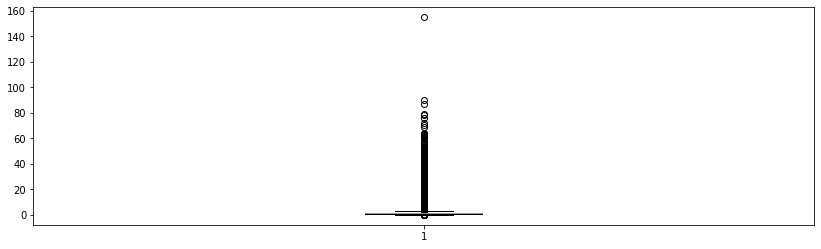

count    2.469779e+07
mean     1.624249e+00
std      1.033191e+00
min      3.225806e-02
25%      1.090909e+00
50%      1.333333e+00
75%      1.750000e+00
max      1.550000e+02
Name: CNT_RATE, dtype: float64

In [ ]:
train_df['CNT_RATE']=train_df['CNT']/train_df['CSTMR_CNT']

plt.boxplot(train_df['CNT_RATE'])
plt.show()

train_df['CNT_RATE'].describe()

In [ ]:
rate_업종별 = train_df.groupby('STD_CLSS_NM')[['CNT','CSTMR_CNT']].sum().reset_index()
rate_업종별['CNT_RATE']=rate_업종별['CNT']/rate_업종별['CSTMR_CNT']
rate_업종별=rate_업종별.sort_values('CNT_RATE',ascending=False,ignore_index=True)
rate_업종별.head(15)

,STD_CLSS_NM,CNT,CSTMR_CNT,CNT_RATE
0,기타음식료품위주종합소매업,81708225,25528646,3.200649
1,택시 운송업,231011553,80780487,2.859744
2,체인화 편의점,786933354,276266871,2.848454
3,슈퍼마켓,422258631,150833582,2.799500
4,기타 대형 종합 소매업,231338754,104847086,2.206440
5,그외 기타 종합 소매업,21529262,10815476,1.990598
6,호텔업,3663424,1951354,1.877375
7,휴양콘도 운영업,1376779,779921,1.765280
8,비알콜 음료점업,164698712,97445101,1.690169
9,내항 여객 운송업,1076981,641861,1.677904


In [ ]:
rate_지역별 = train_df.groupby('CARD_SIDO_NM')['CNT','CSTMR_CNT'].sum().reset_index()
rate_지역별['CNT_RATE']=rate_지역별['CNT']/rate_지역별['CSTMR_CNT']
rate_지역별=rate_지역별.sort_values('CNT_RATE',ascending=False,ignore_index=True)
rate_지역별.head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,CARD_SIDO_NM,CNT,CSTMR_CNT,CNT_RATE
0,서울,994077624,444724002,2.235269
1,경기,701143788,345133871,2.031513
2,인천,147173793,72829668,2.020795
3,대구,164232841,83085072,1.976683
4,울산,55429028,28116110,1.971433
5,대전,60900956,31448075,1.936556
6,충남,91093453,47135876,1.932572
7,광주,82758813,43127377,1.918939
8,세종,10456634,5464559,1.913537
9,경남,149370331,78397280,1.905300


In [ ]:
rate_지역별 = train_df.groupby('CARD_SIDO_NM')[['CNT_RATE']].mean().reset_index()
rate_지역별=rate_지역별.sort_values('CNT_RATE',ascending=False,ignore_index=True)
rate_지역별.head(15)

,CARD_SIDO_NM,CNT_RATE
0,세종,1.896464
1,울산,1.736493
2,대전,1.716627
3,서울,1.716049
4,경기,1.683526
5,대구,1.616291
6,인천,1.607287
7,광주,1.602679
8,충남,1.583293
9,경북,1.579615


In [ ]:
final_cntrate = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM'])['CNT','CSTMR_CNT'].sum().reset_index()
final_cntrate['CNT_RATE']=final_cntrate['CNT']/final_cntrate['CSTMR_CNT']
final_cntrate

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,CNT,CSTMR_CNT,CNT_RATE
0,201901,강원,건강보조식품 소매업,1128,1080,1.044444
1,201901,강원,골프장 운영업,33379,18489,1.805344
2,201901,강원,과실 및 채소 소매업,31050,23566,1.317576
3,201901,강원,관광 민예품 및 선물용품 소매업,1254,1059,1.184136
4,201901,강원,그외 기타 스포츠시설 운영업,168,121,1.388430
...,...,...,...,...,...,...
9433,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,114308,79354,1.440482
9434,202003,충북,한식 음식점업,554154,381083,1.454156
9435,202003,충북,호텔업,259,164,1.579268
9436,202003,충북,화장품 및 방향제 소매업,10013,8728,1.147227


In [ ]:
grouped_multiple = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM'])['CNT_RATE'].mean().reset_index()
grouped_multiple

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,CNT_RATE
0,201901,강원,건강보조식품 소매업,1.040022
1,201901,강원,골프장 운영업,1.761793
2,201901,강원,과실 및 채소 소매업,1.206344
3,201901,강원,관광 민예품 및 선물용품 소매업,1.163138
4,201901,강원,그외 기타 스포츠시설 운영업,1.272137
...,...,...,...,...
9433,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.392550
9434,202003,충북,한식 음식점업,1.422156
9435,202003,충북,호텔업,1.581679
9436,202003,충북,화장품 및 방향제 소매업,1.143846


### CARD_SIDO_NM, HOM_SIDO_NM 이용하여 지역/타지역소비자 정보 파악
final_sidocstmr

In [ ]:
train_df.loc[train_df['CARD_SIDO_NM']==train_df['HOM_SIDO_NM'],'local_cstm'] = '지역소비자'
train_df.loc[train_df['CARD_SIDO_NM']!=train_df['HOM_SIDO_NM'],'local_cstm'] = '타지역소비자'


grouped_multiple = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','local_cstm'])['AMT'].sum().reset_index()

localcstm_df=grouped_multiple[grouped_multiple.local_cstm=='지역소비자']
localcstm_df=localcstm_df.reset_index(drop=True)
localcstm_df.rename(columns={'AMT': 'local_AMT'},inplace=True)
localcstm_df=localcstm_df.drop(['local_cstm'], axis=1)

diffcstm_df=grouped_multiple[grouped_multiple.local_cstm=='타지역소비자']
diffcstm_df=diffcstm_df.reset_index(drop=True)
diffcstm_df.rename(columns={'AMT': 'diff_AMT'},inplace=True)
diffcstm_df=diffcstm_df.drop(['local_cstm'], axis=1)

final_sidocstmr = pd.merge(localcstm_df, diffcstm_df,how='outer')

final_sidocstmr['diff_AMT'].fillna(0, inplace=True)
final_sidocstmr['local_AMT'].fillna(0, inplace=True)

final_sidocstmr.loc[final_sidocstmr['local_AMT'] < final_sidocstmr['diff_AMT'],'big_cstm'] = '타지역소비자'
final_sidocstmr.loc[final_sidocstmr['local_AMT'] > final_sidocstmr['diff_AMT'],'big_cstm'] = '지역소비자'
final_sidocstmr['D_rate'] = final_sidocstmr['diff_AMT'] /(final_sidocstmr['local_AMT'] +final_sidocstmr['diff_AMT'])
final_sidocstmr

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,local_AMT,diff_AMT,big_cstm,D_rate
0,201901,강원,건강보조식품 소매업,147831746.0,523000.0,지역소비자,0.003525
1,201901,강원,골프장 운영업,237561780.0,991638532.0,타지역소비자,0.806735
2,201901,강원,과실 및 채소 소매업,843599235.0,443379871.0,지역소비자,0.344512
3,201901,강원,관광 민예품 및 선물용품 소매업,14415100.0,16241670.0,타지역소비자,0.529791
4,201901,강원,그외 기타 스포츠시설 운영업,13101500.0,0.0,지역소비자,0.000000
...,...,...,...,...,...,...,...
9433,202002,경기,그외 기타 분류안된 오락관련 서비스업,0.0,45000.0,타지역소비자,1.000000
9434,202002,광주,자동차 임대업,0.0,1250950.0,타지역소비자,1.000000
9435,202002,충남,그외 기타 분류안된 오락관련 서비스업,0.0,487000.0,타지역소비자,1.000000
9436,202002,충남,내항 여객 운송업,0.0,45000.0,타지역소비자,1.000000


In [ ]:
no_diff=final_sidocstmr[final_sidocstmr.diff_AMT==0]
no_diff=no_diff.sort_values('local_AMT',ascending=True)
no_diff

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,local_AMT,diff_AMT,big_cstm,D_rate
4398,201907,충북,택시 운송업,1.860000e+04,0.0,지역소비자,0.0
3955,201907,광주,택시 운송업,1.880000e+04,0.0,지역소비자,0.0
5009,201908,충북,버스 운송업,2.000000e+04,0.0,지역소비자,0.0
6056,201910,울산,택시 운송업,2.050000e+04,0.0,지역소비자,0.0
3324,201906,광주,택시 운송업,2.360000e+04,0.0,지역소비자,0.0
...,...,...,...,...,...,...,...
2004,201904,경북,기타 주점업,3.677835e+08,0.0,지역소비자,0.0
8680,202002,제주,기타 주점업,9.193545e+08,0.0,지역소비자,0.0
4299,201907,제주,기타 주점업,1.068307e+09,0.0,지역소비자,0.0
8060,202001,제주,기타 주점업,1.106060e+09,0.0,지역소비자,0.0


In [ ]:
no_local=final_sidocstmr[final_sidocstmr.local_AMT==0]
no_local=no_local.sort_values('diff_AMT',ascending=True)
no_local

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,local_AMT,diff_AMT,big_cstm,D_rate
9392,201902,강원,택시 운송업,0.0,18980.0,타지역소비자,1.0
9405,201905,전남,택시 운송업,0.0,30350.0,타지역소비자,1.0
9436,202002,충남,내항 여객 운송업,0.0,45000.0,타지역소비자,1.0
9433,202002,경기,그외 기타 분류안된 오락관련 서비스업,0.0,45000.0,타지역소비자,1.0
9410,201907,경북,여행사업,0.0,48500.0,타지역소비자,1.0
9390,201901,충남,내항 여객 운송업,0.0,50000.0,타지역소비자,1.0
9404,201905,전남,그외 기타 분류안된 오락관련 서비스업,0.0,66000.0,타지역소비자,1.0
9431,202001,충북,내항 여객 운송업,0.0,84000.0,타지역소비자,1.0
9419,201911,광주,여행사업,0.0,123700.0,타지역소비자,1.0
9412,201907,전남,기타 수상오락 서비스업,0.0,126000.0,타지역소비자,1.0


In [ ]:
grouped_multiple = train_df.groupby(['STD_CLSS_NM','local_cstm'])['AMT'].sum().reset_index()
grouped_multiple.head()

localcstm_df=grouped_multiple[grouped_multiple.local_cstm=='지역소비자']
localcstm_df=localcstm_df.reset_index(drop=True)
localcstm_df.rename(columns={'AMT': 'local_AMT'},inplace=True)
localcstm_df=localcstm_df.drop(['local_cstm'], axis=1)

diffcstm_df=grouped_multiple[grouped_multiple.local_cstm=='타지역소비자']
diffcstm_df=diffcstm_df.reset_index(drop=True)
diffcstm_df.rename(columns={'AMT': 'diff_AMT'},inplace=True)
diffcstm_df=diffcstm_df.drop(['local_cstm'], axis=1)

diffcstm_df

In [ ]:
cstm_stdclss = pd.merge(localcstm_df, diffcstm_df, on='STD_CLSS_NM')

cstm_stdclss.loc[cstm_stdclss['local_AMT'] < cstm_stdclss['diff_AMT'],'big_cstm'] = '타지역소비자'
cstm_stdclss.loc[cstm_stdclss['local_AMT'] > cstm_stdclss['diff_AMT'],'big_cstm'] = '지역소비자'
cstm_stdclss['D/L_rate'] = cstm_stdclss['diff_AMT'] /cstm_stdclss['local_AMT'] 

cstm_stdclss=cstm_stdclss.sort_values('D/L_rate',ascending=False,ignore_index=True)
cstm_stdclss.head(20)

,STD_CLSS_NM,local_AMT,diff_AMT,big_cstm,D/L_rate
0,내항 여객 운송업,5627506779,36387554902,타지역소비자,6.466017
1,버스 운송업,37286982482,192949693515,타지역소비자,5.174720
2,면세점,78683582392,325828610140,타지역소비자,4.140999
3,휴양콘도 운영업,17074675722,62807183784,타지역소비자,3.678382
4,자동차 임대업,9314938128,19063708872,타지역소비자,2.046574
5,여행사업,38292016790,70724680492,타지역소비자,1.846982
6,정기 항공 운송업,204927597177,376171092602,타지역소비자,1.835629
7,택시 운송업,626378809722,1107030732252,타지역소비자,1.767350
8,골프장 운영업,259335007587,336366961241,타지역소비자,1.297036
9,전시 및 행사 대행업,50998485730,53508958516,타지역소비자,1.049226


In [ ]:
grouped_multiple = train_df.groupby(['CARD_SIDO_NM','local_cstm'])['AMT'].sum().reset_index()
grouped_multiple.head()

localcstm_df=grouped_multiple[grouped_multiple.local_cstm=='지역소비자']
localcstm_df=localcstm_df.reset_index(drop=True)
localcstm_df.rename(columns={'AMT': 'local_AMT'},inplace=True)
localcstm_df=localcstm_df.drop(['local_cstm'], axis=1)

diffcstm_df=grouped_multiple[grouped_multiple.local_cstm=='타지역소비자']
diffcstm_df=diffcstm_df.reset_index(drop=True)
diffcstm_df.rename(columns={'AMT': 'diff_AMT'},inplace=True)
diffcstm_df=diffcstm_df.drop(['local_cstm'], axis=1)

In [ ]:
cstm_sido = pd.merge(localcstm_df, diffcstm_df, on='CARD_SIDO_NM')

cstm_sido.loc[cstm_sido['local_AMT'] < cstm_sido['diff_AMT'],'big_cstm'] = '타지역소비자'
cstm_sido.loc[cstm_sido['local_AMT'] > cstm_sido['diff_AMT'],'big_cstm'] = '지역소비자'
cstm_sido['D/L_rate'] = cstm_sido['diff_AMT'] /cstm_sido['local_AMT'] 

cstm_sido=cstm_sido.sort_values('D/L_rate',ascending=False,ignore_index=True)
cstm_sido.head()

## 시도별로는 큰 특징을 찾을 수 없음.

,CARD_SIDO_NM,local_AMT,diff_AMT,big_cstm,D/L_rate
0,서울,10092021194371,4585109854660,지역소비자,0.454330
1,제주,1017397760074,326184464694,지역소비자,0.320607
2,강원,1204443934968,385167364951,지역소비자,0.319789
3,세종,156965899441,47079917907,지역소비자,0.299937
4,인천,2374676626919,681570835994,지역소비자,0.287016


In [ ]:
grouped_multiple = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','local_cstm'])['AMT'].sum().reset_index()

localcstm_df=grouped_multiple[grouped_multiple.local_cstm=='지역소비자']
localcstm_df=localcstm_df.reset_index(drop=True)
localcstm_df.rename(columns={'AMT': 'local_AMT'},inplace=True)
localcstm_df=localcstm_df.drop(['local_cstm'], axis=1)

diffcstm_df=grouped_multiple[grouped_multiple.local_cstm=='타지역소비자']
diffcstm_df=diffcstm_df.reset_index(drop=True)
diffcstm_df.rename(columns={'AMT': 'diff_AMT'},inplace=True)
diffcstm_df=diffcstm_df.drop(['local_cstm'], axis=1)

final_sidocstmr = pd.merge(localcstm_df, diffcstm_df)

final_sidocstmr.loc[final_sidocstmr['local_AMT'] < final_sidocstmr['diff_AMT'],'big_cstm'] = '타지역소비자'
final_sidocstmr.loc[final_sidocstmr['local_AMT'] > final_sidocstmr['diff_AMT'],'big_cstm'] = '지역소비자'
final_sidocstmr['D/L_rate'] = final_sidocstmr['diff_AMT'] /final_sidocstmr['local_AMT'] 
final_sidocstmr

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,local_AMT,diff_AMT,big_cstm,D/L_rate
0,201901,강원,건강보조식품 소매업,147831746,523000,지역소비자,0.003538
1,201901,강원,골프장 운영업,237561780,991638532,타지역소비자,4.174234
2,201901,강원,과실 및 채소 소매업,843599235,443379871,지역소비자,0.525581
3,201901,강원,관광 민예품 및 선물용품 소매업,14415100,16241670,타지역소비자,1.126712
4,201901,강원,그외 기타 종합 소매업,530852390,2478150,지역소비자,0.004668
...,...,...,...,...,...,...,...
8492,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,1267745689,47499610,지역소비자,0.037468
8493,202003,충북,한식 음식점업,14111446379,2041036325,지역소비자,0.144637
8494,202003,충북,호텔업,14598050,650500,지역소비자,0.044561
8495,202003,충북,화장품 및 방향제 소매업,420734834,8146600,지역소비자,0.019363


In [ ]:
grouped= cstm_stdclss.groupby(['REG_YYMM','big_cstm']).size().unstack(fill_value=0).reset_index()
grouped['rate']=grouped['타지역소비자']/grouped['지역소비자']
grouped

big_cstm,REG_YYMM,지역소비자,타지역소비자,rate
0,201901,495,65,0.131313
1,201902,502,67,0.133466
2,201903,498,72,0.144578
3,201904,504,67,0.132937
4,201905,502,71,0.141434
5,201906,500,73,0.146000
6,201907,493,75,0.152130
7,201908,497,78,0.156942
8,201909,502,70,0.139442
9,201910,501,72,0.143713


In [ ]:
grouped=cstm_stdclss.groupby(['REG_YYMM','CARD_SIDO_NM'])['local_AMT','diff_AMT'].sum().reset_index()
grouped['rate']=grouped['diff_AMT']/grouped['local_AMT']
grouped

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,REG_YYMM,CARD_SIDO_NM,local_AMT,diff_AMT,rate
0,201901,강원,78640702729,27546784433,0.350287
1,201901,경기,810046837174,116719653337,0.144090
2,201901,경남,210979698302,22901592947,0.108549
3,201901,경북,146828090577,31584472146,0.215112
4,201901,광주,106094484452,8344430669,0.078651
...,...,...,...,...,...
250,202003,전남,99821954981,16752123292,0.167820
251,202003,전북,112967641762,5661867637,0.050119
252,202003,제주,63222967363,7752988882,0.122629
253,202003,충남,106118783374,18189725631,0.171409


In [ ]:
grouped=cstm_stdclss.groupby(['REG_YYMM','STD_CLSS_NM'])['local_AMT','diff_AMT'].sum().reset_index()
grouped['rate']=grouped['diff_AMT']/grouped['local_AMT']
grouped

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,REG_YYMM,STD_CLSS_NM,local_AMT,diff_AMT,rate
0,201901,건강보조식품 소매업,6637284020,1843014113,0.277676
1,201901,골프장 운영업,6035231444,5933517159,0.983147
2,201901,과실 및 채소 소매업,38062978334,6390134355,0.167883
3,201901,관광 민예품 및 선물용품 소매업,584544708,371007720,0.634695
4,201901,그외 기타 분류안된 오락관련 서비스업,153000,206000,1.346405
...,...,...,...,...,...
609,202003,피자 햄버거 샌드위치 및 유사 음식점업,59093918702,6878319954,0.116396
610,202003,한식 음식점업,562693415415,103880043671,0.184612
611,202003,호텔업,3683060909,1390160932,0.377447
612,202003,화장품 및 방향제 소매업,21504073380,9498715924,0.441717


## SUBMIT 데이터 형태 + 최종 train 데이터 형태 만들기

In [ ]:
AMT_full=train_df['AMT'].sum(axis=0) 
print(str(AMT_full)+' AMT 총액입니다')
train_df.info()

60296027049006 AMT 총액입니다
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 16 columns):
REG_YYMM        int64
CARD_SIDO_NM    object
CARD_CCG_NM     object
STD_CLSS_NM     object
HOM_SIDO_NM     object
HOM_CCG_NM      object
AGE             object
SEX_CTGO_CD     int64
FLC             int64
CSTMR_CNT       int64
AMT             int64
CNT             int64
CNT_gap         int64
CNT_rate        float64
CNT_mark        object
local_cstm      object
dtypes: float64(1), int64(7), object(8)
memory usage: 2.9+ GB


#### 변수에 따른 데이터 조합 보기

In [ ]:
for_final = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','AGE'])['AMT'].sum().reset_index()
AMT_final=for_final['AMT'].sum(axis=0) 
min_AMT=min(for_final['AMT'])
print(str(AMT_final))
print(str(min_AMT)+' AMT min 값')
for_final

60296027049006
2800 AMT min 값


,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AGE,AMT
0,201901,강원,건강보조식품 소매업,20s,311200
1,201901,강원,건강보조식품 소매업,30s,13787845
2,201901,강원,건강보조식품 소매업,40s,19838720
3,201901,강원,건강보조식품 소매업,50s,67022381
4,201901,강원,건강보조식품 소매업,60s,36262530
...,...,...,...,...,...
58670,202003,충북,휴양콘도 운영업,20s,1412910
58671,202003,충북,휴양콘도 운영업,30s,5730030
58672,202003,충북,휴양콘도 운영업,40s,2059400
58673,202003,충북,휴양콘도 운영업,50s,2183350


In [ ]:
for_final = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','FLC'])['AMT'].sum().reset_index()
AMT_final=for_final['AMT'].sum(axis=0) 
min_AMT=min(for_final['AMT'])
print(str(AMT_final))
print(str(min_AMT)+' AMT min 값')
for_final

60296027049006
2800 AMT min 값


,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,FLC,AMT
0,201901,강원,건강보조식품 소매업,1,311200
1,201901,강원,건강보조식품 소매업,2,14932515
2,201901,강원,건강보조식품 소매업,3,16024225
3,201901,강원,건강보조식품 소매업,4,69692206
4,201901,강원,건강보조식품 소매업,5,47394600
...,...,...,...,...,...
44977,202003,충북,휴양콘도 운영업,1,1412910
44978,202003,충북,휴양콘도 운영업,2,5730030
44979,202003,충북,휴양콘도 운영업,3,1673700
44980,202003,충북,휴양콘도 운영업,4,2569050


In [ ]:
for_final = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','AGE','FLC'])['AMT'].sum().reset_index()
AMT_final=for_final['AMT'].sum(axis=0) 
min_AMT=min(for_final['AMT'])
print(str(AMT_final))
print(str(min_AMT)+' AMT min 값')
for_final

60296027049006
2800 AMT min 값


,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AGE,FLC,AMT
0,201901,강원,건강보조식품 소매업,20s,1,311200
1,201901,강원,건강보조식품 소매업,30s,2,13787845
2,201901,강원,건강보조식품 소매업,40s,2,1144670
3,201901,강원,건강보조식품 소매업,40s,3,16024225
4,201901,강원,건강보조식품 소매업,40s,4,2669825
...,...,...,...,...,...,...
104265,202003,충북,휴양콘도 운영업,30s,2,5730030
104266,202003,충북,휴양콘도 운영업,40s,3,1673700
104267,202003,충북,휴양콘도 운영업,40s,4,385700
104268,202003,충북,휴양콘도 운영업,50s,4,2183350


In [ ]:
REG_YYMMs     = train_df['REG_YYMM'].unique()
CARD_SIDO_NMs = train_df['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = train_df['STD_CLSS_NM'].unique()
AGEs          = train_df['AGE'].unique()
FLCs          = train_df['FLC'].unique()


full_ver = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for REG_YYMM in REG_YYMMs:
            for AGE in AGEs:
                  for FLC in FLCs:
                    full_ver.append([REG_YYMM,CARD_SIDO_NM, STD_CLSS_NM, AGE, FLC])

full_ver = np.array(full_ver)
full_ver = pd.DataFrame(data=full_ver, columns=['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','AGE','FLC'])
full_ver['REG_YYMM'] = full_ver['REG_YYMM'].astype(int)
full_ver['FLC'] = full_ver['FLC'].astype(int)

to_see=pd.merge(full_ver,for_final,how='outer')
to_see_null=to_see[pd.isnull(to_see).any(axis=1)]
to_see_null

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AGE,FLC,AMT
1,201901,강원,건강보조식품 소매업,20s,2,NaN
2,201901,강원,건강보조식품 소매업,20s,3,NaN
3,201901,강원,건강보조식품 소매업,20s,4,NaN
4,201901,강원,건강보조식품 소매업,20s,5,NaN
5,201901,강원,건강보조식품 소매업,30s,1,NaN
...,...,...,...,...,...,...
365920,202003,충북,정기 항공 운송업,10s,1,NaN
365921,202003,충북,정기 항공 운송업,10s,2,NaN
365922,202003,충북,정기 항공 운송업,10s,3,NaN
365923,202003,충북,정기 항공 운송업,10s,4,NaN


## imputation 및 full train/test 만들기

In [ ]:
final_train = train_df.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM'])['AMT'].sum().reset_index()
AMT_final=final_train['AMT'].sum(axis=0) 
min_AMT=min(final_train['AMT'])
print(str(AMT_final))
print(str(min_AMT)+' AMT min 값')
final_train.info()

60296027049006
16500 AMT min 값
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9438 entries, 0 to 9437
Data columns (total 4 columns):
REG_YYMM        9438 non-null int64
CARD_SIDO_NM    9438 non-null object
STD_CLSS_NM     9438 non-null object
AMT             9438 non-null int64
dtypes: int64(2), object(2)
memory usage: 295.1+ KB


In [ ]:
## final_predictset
final_predictset.info()

final_train=pd.merge(final_train,final_predictset,how='left')



## final_sexrate
final_sexrate=final_sexrate.drop(columns=['CSTMR_M','CSTMR_W','CSTMR_full'])
#final_sexrate.info()

final_train=pd.merge(final_train,final_sexrate,how='left')


## final_cntrate
final_cntrate=final_cntrate.drop(columns=['CNT','CSTMR_CNT'])
#final_cntrate.info()

final_train=pd.merge(final_train,final_cntrate,how='left')



## final_sidocstmr
final_sidocstmr=final_sidocstmr.drop(columns=['local_AMT','diff_AMT'])
#final_sidocstmr.info()

final_train=pd.merge(final_train,final_sidocstmr,how='left')
final_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
REG_YYMM    235 non-null int64
sales_tr    235 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.8 KB


REG_YYMM        0
CARD_SIDO_NM    0
STD_CLSS_NM     0
AMT             0
sales_tr        0
W_rate(full)    0
CNT_RATE        0
big_cstm        0
D_rate          0
dtype: int64

In [ ]:
# REG_YYMM, CARD_SIDO_NM, STD_CLSS_NM test set을 위한 subset 템플릿 만들기
REG_YYMMs     = [202004,202007]
CARD_SIDO_NMs = train_df['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = train_df['STD_CLSS_NM'].unique()

submit_sub = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for REG_YYMM in REG_YYMMs:
                    submit_sub.append([REG_YYMM,CARD_SIDO_NM, STD_CLSS_NM])

submit_sub = np.array(submit_sub)
submit_sub = pd.DataFrame(data=submit_sub, columns=['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM'])
submit_sub['REG_YYMM'] = submit_sub['REG_YYMM'].astype(int)

submit_sub=pd.merge(submit_sub,final_predictset,how='left')
submit_sub.info()
submit_sub['W_rate(full)']=np.nan
submit_sub['CNT_RATE']=np.nan
submit_sub['big_cstm']=np.nan
submit_sub['D_rate']=np.nan
submit_sub.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 0 to 1393
Data columns (total 4 columns):
REG_YYMM        1394 non-null int64
CARD_SIDO_NM    1394 non-null object
STD_CLSS_NM     1394 non-null object
sales_tr        1394 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 54.5+ KB


REG_YYMM           0
CARD_SIDO_NM       0
STD_CLSS_NM        0
sales_tr           0
W_rate(full)    1394
CNT_RATE        1394
big_cstm        1394
D_rate          1394
dtype: int64

In [ ]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

final_train['year'] =final_train['REG_YYMM'].apply(lambda x: grap_year(x))
final_train['month'] = final_train['REG_YYMM'].apply(lambda x: grap_month(x))
final_train['y']='y'
final_train['m']='m'
final_train['year']=final_train['year'].map(str)+final_train['y']
final_train['month']=final_train['month'].map(str)+final_train['m']
final_train=final_train.drop(columns=['y','m'])


submit_sub['year'] =submit_sub['REG_YYMM'].apply(lambda x: grap_year(x))
submit_sub['month'] = submit_sub['REG_YYMM'].apply(lambda x: grap_month(x))
submit_sub['y']='y'
submit_sub['m']='m'
submit_sub['year']=submit_sub['year'].map(str)+submit_sub['y']
submit_sub['month']=submit_sub['month'].map(str)+submit_sub['m']
submit_sub=submit_sub.drop(columns=['y','m'])

#AMT_real=final_train['AMT']
#final_train=final_train.drop(columns=['AMT'])
final_train['TRAIN']=1
submit_sub['TRAIN']=0

final_train.info()
submit_sub.info()

for_na=pd.concat([final_train,submit_sub],axis=0)

for_na.isna().sum()
for_na=for_na.reset_index(drop=True)
for_na

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9438 entries, 0 to 9437
Data columns (total 12 columns):
REG_YYMM        9438 non-null int64
CARD_SIDO_NM    9438 non-null object
STD_CLSS_NM     9438 non-null object
AMT             9438 non-null int64
sales_tr        9438 non-null float64
W_rate(full)    9438 non-null float64
CNT_RATE        9438 non-null float64
big_cstm        9438 non-null object
D_rate          9438 non-null float64
year            9438 non-null object
month           9438 non-null object
TRAIN           9438 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 958.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 0 to 1393
Data columns (total 11 columns):
REG_YYMM        1394 non-null int64
CARD_SIDO_NM    1394 non-null object
STD_CLSS_NM     1394 non-null object
sales_tr        1394 non-null float64
W_rate(full)    0 non-null float64
CNT_RATE        0 non-null float64
big_cstm        0 non-null float64
D_rate          0 non-nu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,AMT,CARD_SIDO_NM,CNT_RATE,D_rate,REG_YYMM,STD_CLSS_NM,TRAIN,W_rate(full),big_cstm,month,sales_tr,year
0,1.483547e+08,강원,1.044444,0.003525,201901,건강보조식품 소매업,1,0.598148,지역소비자,1m,109.80000,2019y
1,1.229200e+09,강원,1.805344,0.806735,201901,골프장 운영업,1,0.345070,타지역소비자,1m,109.80000,2019y
2,1.286979e+09,강원,1.317576,0.344512,201901,과실 및 채소 소매업,1,0.509378,지역소비자,1m,109.80000,2019y
3,3.065677e+07,강원,1.184136,0.529791,201901,관광 민예품 및 선물용품 소매업,1,0.512748,타지역소비자,1m,109.80000,2019y
4,1.310150e+07,강원,1.388430,0.000000,201901,그외 기타 스포츠시설 운영업,1,0.214876,지역소비자,1m,109.80000,2019y
...,...,...,...,...,...,...,...,...,...,...,...,...
10827,NaN,충북,NaN,NaN,202007,내항 여객 운송업,0,NaN,NaN,7m,114.20679,2020y
10828,NaN,충북,NaN,NaN,202004,그외 기타 분류안된 오락관련 서비스업,0,NaN,NaN,4m,108.90000,2020y
10829,NaN,충북,NaN,NaN,202007,그외 기타 분류안된 오락관련 서비스업,0,NaN,NaN,7m,114.20679,2020y
10830,NaN,충북,NaN,NaN,202004,정기 항공 운송업,0,NaN,NaN,4m,108.90000,2020y


#### Datawig 패키지 활용하여 W_rate, CNT_RATE, D_rate, big_cstm 변수 imputation 하기, 모델 저장

In [ ]:
##https://datawig.readthedocs.io/en/latest/source/userguide.html#introduction-to-simpleimputer 
###  W_rate(full)

imputer=datawig.SimpleImputer(
    input_columns=['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr'],
    output_column='W_rate(full)',
    output_path='imputer_Wrate_numeric_model'
)

final_train_sub1=final_train[['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr','W_rate(full)']]
for_na_sub1=submit_sub[['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr','W_rate(full)']]

imputer.fit_hpo(train_df=final_train_sub1,num_epochs=2)

predictions_W = imputer.predict(for_na_sub1)

#Load saved model
#imputer = SimpleImputer.load('./imputer_Wrate_numeric_model')

W_RATE_IM=predictions_W['W_rate(full)_imputed']
W_df=pd.DataFrame(W_RATE_IM,columns=['W_rate(full)_imputed'])
W_df.to_csv('W_rate_full_imp.csv',index=False)

In [ ]:
### CNT_RATE

imputer=datawig.SimpleImputer(
    input_columns=['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr'],
    output_column='CNT_RATE',
    output_path='imputer_CNTRATE_numeric_model'
)

final_train_sub1=final_train[['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr','CNT_RATE']]
for_na_sub1=submit_sub[['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr','CNT_RATE']]

imputer.fit_hpo(train_df=final_train_sub1,num_epochs=2)

predictions_W = imputer.predict(for_na_sub1)

#Load saved model
#imputer = SimpleImputer.load('./imputer_CNTRATE_numeric_model')

CNT_RATE_IM=predictions_W['CNT_RATE_imputed']
CNT_df=pd.DataFrame(CNT_RATE_IM,columns=['CNT_RATE_imputed'])
CNT_df.to_csv('CNT_RATE_full_imp.csv',index=False)

In [ ]:
### D_rate

imputer=datawig.SimpleImputer(
    input_columns=['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr'],
    output_column='D_rate',
    output_path='imputer_Drate_numeric_model'
)

final_train_sub1=final_train[['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr','D_rate']]
for_na_sub1=submit_sub[['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr','D_rate']]

imputer.fit_hpo(train_df=final_train_sub1,num_epochs=2)

predictions_W = imputer.predict(for_na_sub1)

#Load saved model
#imputer = SimpleImputer.load('./imputer_Drate_numeric_model')

D_rate_IM=predictions_W['D_rate_imputed']
D_df=pd.DataFrame(D_rate_IM,columns=['D_rate_imputed'])
D_df.to_csv('D_rate_full_imp.csv',index=False)

In [ ]:
#big_cstm

imputer=datawig.SimpleImputer(
    input_columns=['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr'],
    output_column='big_cstm',
    output_path='imputer_BIGCSTM_cat_model'
)

final_train_sub1=final_train[['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr','big_cstm']]
for_na_sub1=submit_sub[['year','month','CARD_SIDO_NM','STD_CLSS_NM','sales_tr','big_cstm']]

imputer.fit_hpo(train_df=final_train_sub1,num_epochs=2)

predictions_W = imputer.predict(for_na_sub1)

#Load saved model
#imputer = SimpleImputer.load('./imputer_BIGCSTM_cat_model')

big_cstm_IM=predictions_W['big_cstm_imputed']
big_df=pd.DataFrame(big_cstm_IM,columns=['big_cstm_imputed'])
big_df.to_csv('big_cstm_full_imp.csv',index=False)